In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [ ]:
# Function needed for second phase

def sigmoid(x):

  return 1 / (1 + np.exp(-x))


def sigmoidDerivative(x):
  return sigmoid(x) * (1- sigmoid(x))

def maxIndex(l):

  max = None
  index = None

  for i in range(l.size):

    if max is None:
      max = l[i][0]
      index = i
    
    elif max < l[i][0]:
      max = l[i][0]
      index = i
  
  return index

100


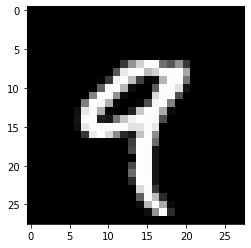

In [ ]:
# Show Function

def showImage(img):
  image = img.reshape((28, 28))
  plt.imshow(image, 'gray')

# Reading the Train Set

trainImageFile = open('/content/drive/MyDrive/Colab Notebooks/ANN-HandDigitRecognition/train-images.idx3-ubyte', 'rb')
trainImageFile.seek(4)
numTrainImage = int.from_bytes(trainImageFile.read(4), 'big')
trainImageFile.seek(16)

trainLabelFile = open('/content/drive/MyDrive/Colab Notebooks/ANN-HandDigitRecognition/train-labels.idx1-ubyte', 'rb')
trainLabelFile.seek(8)

trainSet = []
numTrainImage = 100

for i in range(numTrainImage):
  image = np.zeros((784,1))
  for j in range(784):
    image[j,0] = int.from_bytes(trainImageFile.read(1), 'big') / 256
  
  labelValue = int.from_bytes(trainLabelFile.read(1), 'big')
  label = np.zeros((10,1))
  label[labelValue, 0] = 1

  trainSet.append((image, label))



In [ ]:
weight1 = np.random.randn(16, 784)
weight2 = np.random.randn(16, 16)
weight3 = np.random.randn(10, 16)

bias1 = np.zeros((16,1))
bias2 = np.zeros((16,1))
bias3 = np.zeros((10,1))

count = 0
for i in range(100):

  a1 = sigmoid((weight1 @ trainSet[i][0]) + bias1)
  a2 = sigmoid((weight2 @ a1) + bias2)
  a3 = sigmoid((weight3 @ a2) + bias3)

  if maxIndex(trainSet[i][1]) == maxIndex(a3):
    count += 1

print(" Accuracy:", count, "%")


 Accuracy: 7 %


In [ ]:
weight1 = np.random.randn(16, 784)
weight2 = np.random.randn(16, 16)
weight3 = np.random.randn(10, 16)

bias1 = np.zeros((16,1))
bias2 = np.zeros((16,1))
bias3 = np.zeros((10,1))

# Hyperprameters
learningRate = 1
numEpochs = 20
batchSize = 10

for i in range(numEpochs):
  
  
  random.shuffle(trainSet)
  for j in range(int(numTrainImage/batchSize)):

    gradW1 = np.zeros((16, 784))
    gradW2 = np.zeros((16, 16))
    gradW3 = np.zeros((10, 16))

    gradB1 = np.zeros((16, 1))
    gradB2 = np.zeros((16, 1))
    gradB3 = np.zeros((10, 1))

    gradA1 = np.zeros((16, 1))
    gradA2 = np.zeros((16, 1))

    cost = 0
    for k in range(j*batchSize, (j+1)*batchSize):

      z1 = (weight1 @ trainSet[k][0]) + bias1
      a1 = sigmoid(z1)
      
      z2 = (weight2 @ a1) + bias2
      a2 = sigmoid(z2)

      z3  =(weight3 @ a2) + bias3
      a3 = sigmoid(z3)

      # Cost Function
      
      for l in range(a3.size):
        cost += (a3[l] - trainSet[k][1][l]) ** 2
      
      # w3, b3, a2

      for jj in range(10):
        for kk in range(16):
          
          gradW3[jj][kk] += 2 * (a3[jj][0] - trainSet[k][1][jj]) * sigmoidDerivative(z3[jj][0]) * a2[kk][0]

      
      for ii in range(10):

        gradB3[ii][0] += 2 * (a3[ii][0] - trainSet[k][1][ii]) * sigmoidDerivative(z3[ii][0])

      
      for ii in range(16):
        for jj in range(10):

          gradA2 [ii][0] += 2 * (a3[jj][0] - trainSet[k][1][jj]) * sigmoidDerivative(z3[jj][0]) * weight3[jj][ii]

# --------------------------------------------------------------------------------

      # w2, b2, a1

      for jj in range(16):
        for kk in range(16):
          
          gradW2[jj][kk] += gradA2[jj][0] * sigmoidDerivative(z2[jj][0]) * a1[kk][0]

      
      for ii in range(16):

        gradB2[ii][0] += gradA2[ii][0] * sigmoidDerivative(z2[ii][0])

      
      for ii in range(16):
        for jj in range(16):

          gradA1 [ii][0] += gradA2[jj][0] * sigmoidDerivative(z2[jj][0]) * weight2[jj][ii]


# ------------------------------------------------------------------------------------

      # w1, b1

      for jj in range(16):
        for kk in range(784):
          
          gradW1[jj][kk] += gradA1[jj][0] * sigmoidDerivative(z1[jj][0]) * trainSet[k][0][kk]
      
      for ii in range(16):

        gradB1[ii][0] += gradA1[ii][0] * sigmoidDerivative(z1[ii][0])

    
    weight1 -= learningRate * (gradW1/batchSize)
    weight2 -= learningRate * (gradW2/batchSize)
    weight3 -= learningRate * (gradW3/batchSize)

    bias1 -= learningRate * (gradB1/batchSize)
    bias2 -= learningRate * (gradB2/batchSize)
    bias3 -= learningRate * (gradB3/batchSize)


# Accuracy Calculator
count = 0
for i in range(100):

  a1 = sigmoid((weight1 @ trainSet[i][0]) + bias1)
  a2 = sigmoid((weight2 @ a1) + bias2)
  a3 = sigmoid((weight3 @ a2) + bias3)

  if maxIndex(trainSet[i][1]) == maxIndex(a3):
    count += 1

print(" Accuracy:", count, "%")

      

 Accuracy: 30 %


 Accuracy: 90.125 %


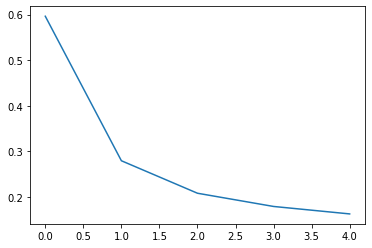

In [ ]:
# Accuracy Calculator
count = 0
for i in range(numTrainImage):

  a1 = sigmoid((weight1 @ trainSet[i][0]) + bias1)
  a2 = sigmoid((weight2 @ a1) + bias2)
  a3 = sigmoid((weight3 @ a2) + bias3)

  if maxIndex(trainSet[i][1]) == maxIndex(a3):
    count += 1

print(" Accuracy:", count/numTrainImage * 100, "%")

plt.plot(costList)
plt.show()

In [ ]:
weight1 = np.random.randn(16, 784)
weight2 = np.random.randn(16, 16)
weight3 = np.random.randn(10, 16)

bias1 = np.zeros((16,1))
bias2 = np.zeros((16,1))
bias3 = np.zeros((10,1))

# Hyperprameters
learningRate = 1
numEpochs = 5
batchSize = 50

costList = []

for i in range(numEpochs):
  

  cost = 0
  random.shuffle(trainSet)

  for j in range(int(numTrainImage/batchSize)):

    gradW1 = np.zeros((16, 784))
    gradW2 = np.zeros((16, 16))
    gradW3 = np.zeros((10, 16))

    gradB1 = np.zeros((16, 1))
    gradB2 = np.zeros((16, 1))
    gradB3 = np.zeros((10, 1))

    gradA1 = np.zeros((16, 1))
    gradA2 = np.zeros((16, 1))

    
    for k in range((j-1)*batchSize, (j)*batchSize):

    
      z1 = (weight1 @ trainSet[k][0]) + bias1
      a1 = sigmoid(z1)
      
      z2 = (weight2 @ a1) + bias2
      a2 = sigmoid(z2)

      z3  =(weight3 @ a2) + bias3
      a3 = sigmoid(z3)

      # Cost Function
      
      for l in range(a3.size):
        cost += (a3[l] - trainSet[k][1][l]) ** 2
      


      # w3, b3, a2


      gradW3 += (sigmoidDerivative(z3) * (2 * a3 - 2 * trainSet[k][1])) @ (np.transpose(a2))

      gradB3 += (sigmoidDerivative(z3) * (2 * a3 - 2 * trainSet[k][1]))

      gradA2 = (np.transpose(weight3)) @ (sigmoidDerivative(z3) * (2 * a3 - 2 * trainSet[k][1]))


      # --------------------------------------------------------------------------------

      # w2, b2, a1

      gradW2 += (sigmoidDerivative(z2) * gradA2) @ (np.transpose(a1))

      gradB2 += (sigmoidDerivative(z2) * gradA2)

      gradA1 = (np.transpose(weight2)) @ (sigmoidDerivative(z2) * gradA2)


      # ------------------------------------------------------------------------------------

      # w1, b1


      gradW1 += (sigmoidDerivative(z1) * gradA1) @ (np.transpose(trainSet[k][0]))

      gradB1 += (sigmoidDerivative(z1) * gradA1)

    
    weight1 -= learningRate * (gradW1/batchSize)
    weight2 -= learningRate * (gradW2/batchSize)
    weight3 -= learningRate * (gradW3/batchSize)

    bias1 -= learningRate * (gradB1/batchSize)
    bias2 -= learningRate * (gradB2/batchSize)
    bias3 -= learningRate * (gradB3/batchSize)
  
  costList.append(cost / numTrainImage)

